In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statistics

In [3]:
kashti=pd.read_csv('kashti.csv')

In [4]:
kashti

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#MEAN,MEDIAN,MODE
kashti['Age'].mean()


30.272590361445783

In [6]:
kashti['Age'].mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [7]:
kashti['Age'].median()

27.0

I:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

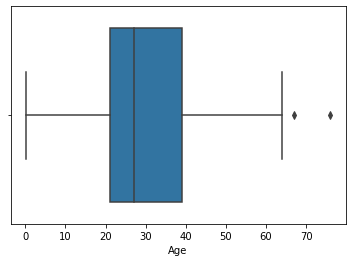

In [8]:
#Boxplot
x=kashti['Age']
sns.boxplot(x)

<AxesSubplot:xlabel='Age', ylabel='Count'>

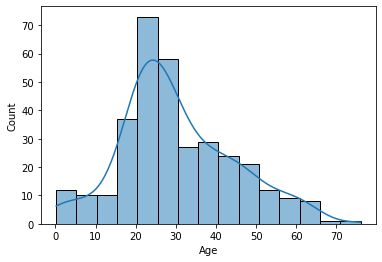

In [9]:
#Checking normal distribution
sns.histplot(x,kde=True)

I:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

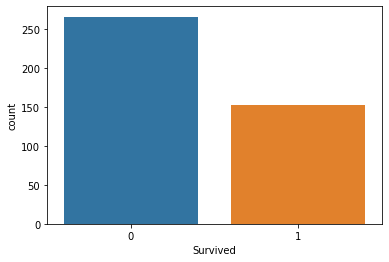

In [10]:
y=kashti['Survived']
sns.countplot(y)

In [11]:
tips=pd.read_csv('tips.csv')

In [12]:
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
#Percentiles for IQR to find lower and higher fence(Outlier detection)
np.percentile(tips['total_bill'],[25,75])
#IQR=1.-0.



array([13.3475, 24.1275])

In [14]:
iqr=24.1275-13.3475
iqr

10.780000000000001

In [15]:
#outlier detection function
dataset=[1,2,3,6,789,4,5,6,73,4,5,6,7,3,2,1,7,9,0]

<AxesSubplot:ylabel='Count'>

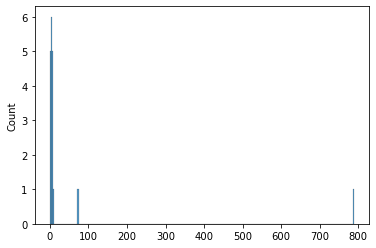

In [16]:
sns.histplot(dataset)

In [17]:
#Function for outlier detection


outliers=[]

def detect_outliers(data):
    limit=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>limit:
            outliers.append(i)
    return outliers
    

In [18]:
detect_outliers(kashti['Age'])

[76.0]

I:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

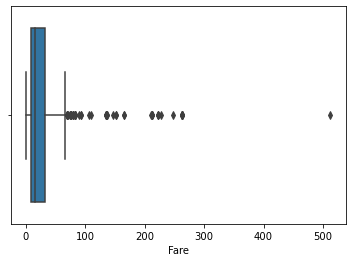

In [19]:
x=kashti['Fare']
sns.boxplot(x)

In [20]:
detect_outliers(tips['total_bill'])

[76.0, 48.27, 48.17, 50.81, 48.33]

In [21]:
kashti['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

# IQR
1)sorting the data

2)q1 and q3

3)iqr=q3-q1

4)lower fence= q1-1.5(iqr)

5)higer fence= q3+1.5(iqr)


In [22]:
#Step-1
dataset=[1,2,3,6,789,4,5,6,73,4,5,6,7,3,2,1,7,9,0]
a=np.sort(kashti['Age'])
a

array([ 0.17,  0.33,  0.75,  0.83,  0.92,  1.  ,  1.  ,  1.  ,  2.  ,
        2.  ,  3.  ,  5.  ,  6.  ,  6.  ,  6.  ,  7.  ,  8.  ,  8.  ,
        9.  ,  9.  , 10.  , 10.  , 11.5 , 12.  , 12.  , 13.  , 13.  ,
       13.  , 14.  , 14.  , 14.5 , 15.  , 16.  , 16.  , 17.  , 17.  ,
       17.  , 17.  , 17.  , 17.  , 17.  , 18.  , 18.  , 18.  , 18.  ,
       18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  ,
       18.5 , 18.5 , 18.5 , 19.  , 19.  , 19.  , 19.  , 20.  , 20.  ,
       20.  , 20.  , 20.  , 20.  , 20.  , 20.  , 21.  , 21.  , 21.  ,
       21.  , 21.  , 21.  , 21.  , 21.  , 21.  , 21.  , 21.  , 21.  ,
       21.  , 21.  , 21.  , 21.  , 21.  , 22.  , 22.  , 22.  , 22.  ,
       22.  , 22.  , 22.  , 22.  , 22.  , 22.  , 22.  , 22.  , 22.  ,
       22.  , 22.  , 22.  , 22.5 , 23.  , 23.  , 23.  , 23.  , 23.  ,
       23.  , 23.  , 23.  , 23.  , 23.  , 23.  , 24.  , 24.  , 24.  ,
       24.  , 24.  , 24.  , 24.  , 24.  , 24.  , 24.  , 24.  , 24.  ,
       24.  , 24.  ,

In [23]:
#Finding q1 and q3
kashti['Age'].describe()

#q1=21
#q3=39

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [24]:
#Finding iqr

iqr=39-21
iqr

18

In [25]:
#Findinf lower fence nand higher fence
q1=21
q3=39
iqr=18
higher_fence= q3+1.5*(iqr)
lower_fence= q1-1.5*(iqr)

In [26]:
higher_fence

66.0

In [27]:
lower_fence

-6.0